# Tidsserier
English version | [Startsida](../index.html)

I det här inlägget ska jag gå igenom grundläggande kommandon för att jobba med tidsseriedata. Med det avses data där en och samma sak mäts om och om igen, över tid.

Man kan analysera sådan data genom att bara lägga in den som vanligt och använda helt vanliga kommandon. Men det går att göra mer. Med speciella tidsseriekommandon kan vi undersöka förändring, och hur olika tidpunkter förhåller sig till varandra.

Datan vi ska analysera är börskurser, närmare bestämt dagliga slutkurser för Dow Jones Index i USA, från april 2019 till april 2020. [Datan kan laddas ned här.](../data/stocks.dta) I koden nedan laddar vi in datan och tittar på de 10 första raderna:

In [46]:
use "../data/stocks.dta", clear
list in 1/10




     +---------------------------------+
     |      date   dowjo~se   dowjo~me |
     |---------------------------------|
  1. | 29apr2019    26554.4    2.8e+08 |
  2. | 30apr2019    26592.9    3.4e+08 |
  3. | 01may2019    26430.1    3.0e+08 |
  4. | 02may2019    26307.8    2.9e+08 |
  5. | 03may2019    26504.9    2.5e+08 |
     |---------------------------------|
  6. | 06may2019    26438.5    2.8e+08 |
  7. | 07may2019    25965.1    3.3e+08 |
  8. | 08may2019    25967.3    2.8e+08 |
  9. | 09may2019    25828.4    3.3e+08 |
 10. | 10may2019    25942.4    2.9e+08 |
     +---------------------------------+


## Ange tidsserien med `tsset`
När man jobbar med tidsserier behöver vi en variabel som visar tiden, det vill säga i vilken ordning observationerna kommer.

I datan finns det tre variabler: date, dowjones_close och dowjones_volume. Datumvariabeln är vår tidsvariabel. Den är formaterad enligt Statas princip för datumvariabler. Stata fattar alltså att 20:e april är en dag efter 19:e april och en vecka efter 13:e april, till exempel. Hur man ställer in variablerna på det sättet kommer jag gå igenom i ett annat inlägg.

Man måste dock inte ha en sådan variabel. Man kan också ha en variabel som bara anger ett nummer i en sekvens, alltså 1, 2, 3, och så vidare. Är datan mätt varje dag blir det såklart mest intuitivt att använda datumvariabeln som tidsvariabel.

**Vi ska nu berätta för Stata vilken variabel som är vår tidsvariabel.** Det gör vi med kommandot `tsset`. Man skriver bara `tsset` följt av variabeln som anger tiden, i vårt fall variabeln date.

In [47]:
tsset date

        time variable:  date, 29apr2019 to 28apr2020, but with gaps
                delta:  1 day


Stata beskriver att variabeln går från 29 april 2019 till 28 april 2020, fast att det är vissa hål. På helgerna har till exempel börserna stängt, och de finns därförinte med i datan.

Raden "delta" visar hur stort "ett steg" är: en dag. Vanligtvis behöver man inte ange det, men om vi till exempel bara skulle ha en observation per vecka hade vi kunnat skriva `tsset date, delta(7)` för att visa att varje "steg" är en vecka. Men det behövs alltså inte här.

## Rita upp en linjegraf
Nu kan vi rita upp datan i ett linjediagram, för att se hur den utvecklats över tid. Eftersom vi angett vad tidsvariabeln är kan vi använda kommandot `tsline`. Vi skriver då bara `tsline` och vilken variabel det är vi vill rita ut, till exempel stängningskursen för Dow Jones:

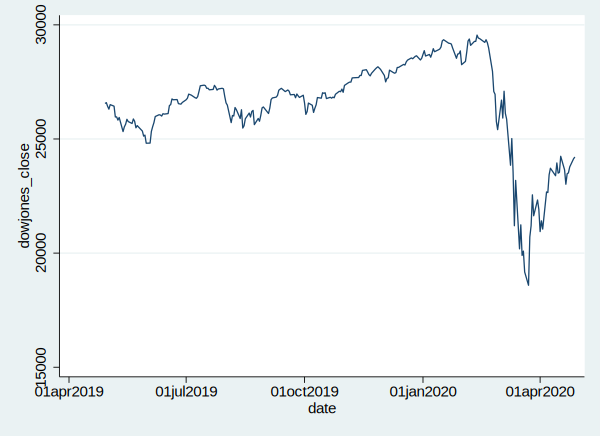

In [48]:
tsline dowjones_close

Coronapandemin i Mars 2020 gör ett tydligt avtryck! Resultatet blir exakt samma som om vi gjort det med det vanliga twowaykommandot, alltså `twoway (line dowjones_close date)` men det här är lite snabbare.

## Skapa olika typer av tidsvariabler (laggade, ledande, delta)


Nu kommer vi till fördelarna med att ställa in tidsserien, nämligen inbyggda kommandon för att skapa olika variabler som har att göra med just tiden.

### Laggade variabler
Först har vi de laggade variablerna. De visar vad en variabel hade för värde vid en tidigare tidpunkt. Hur förhåller sig till exempel Dow Jones-indexet till sig själv, en dag eller en vecka tidigare? Vi kan lätt ta reda på det genom att använda prefixet `l.` framför en variabel. Skriver vi `l.dowjones_close` avses värdet på Dow Jones en dag tidigare. Skriver vi `l7.dowjones_close` får vi värdet sju dagar tidigare, och så vidare.

Vi kan till exempel ta fram en korrelationsmatris som visar hur dagens värde korrelerar med värdet för en vecka sedan, och för två veckor sedan:

In [44]:
corr dowjones_close l.dowjones_close l7.dowjones_close l14.dowjones_close

(obs=180)

             |                 L.      L7.     L14.
             | dowjo~se dowjo~se dowjo~se dowjo~se
-------------+------------------------------------
dowjones_c~e |
         --. |   1.0000
         L1. |   0.9752   1.0000
         L7. |   0.8791   0.8967   1.0000
        L14. |   0.7413   0.7574   0.8722   1.0000



Korrelationen mellan dagens börskurs och gårdagens är alltså väldigt stark: 0.98. Sambandet med kursen en vecka sedan är något svagare, och med två veckor tidigare ännu svagare (vilket inte är konstigt, mer har ju hunnit förändras).

Vi kan också använda dessa kommandon när vi gör grafer. Vi förskjuter då linjen till höger. I grafen nedan visar den blåa linjen dagens värde, och den röda linjen vad börskursen var två veckor tidigare.

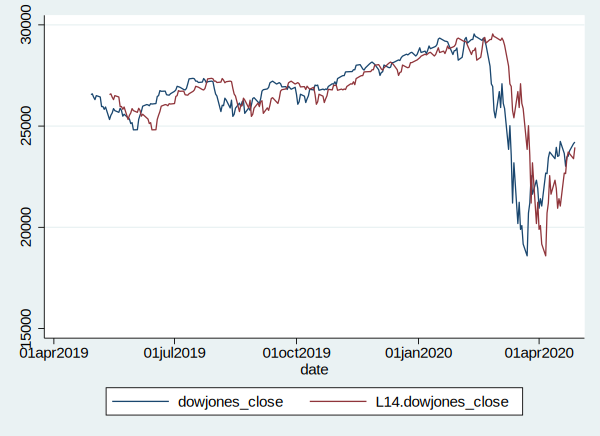

In [49]:
tsline dowjones_close l14.dowjones_close

### Ledande variabler
Ledande variabler är precis samma som de laggade, fast för framtiden. De visar alltså vad värdet kommer vara längre fram. Prefixet vi använder för dem är `f.`. `f1.dowjones_close` visar vilket värde Dow Jones har dagen efter det aktuella datumet, och `f14.dowjones_close` visar värdet två veckor senare.

In [50]:
corr dowjones_close f1.dowjones_close f14.dowjones_close

(obs=181)

             |                 F.     F14.
             | dowjo~se dowjo~se dowjo~se
-------------+---------------------------
dowjones_c~e |
         --. |   1.0000
         F1. |   0.9741   1.0000
        F14. |   0.7330   0.7619   1.0000



### Deltavariabler (förändringsvariabler)
Delta står i de här sammanhangen för förändring. Med prefixed `d.` får vi fram hur variabeln har förändrats sedan föregående tidsenhet - i det här fallet sedan dagen innan. Här får man dock tänka på att det är en dags förändring (eftersom vi ställde in att en dag är ett steg). Så måndagarna jämförs med söndagarna, då börsen är stängd, och inte fredagarna. Eftersom det inte finns något värde på söndag försvinner också måndagarna när vi kollar på förändring på det här sättet.

Nedan kollar vi på hur Dow Jones Index förändrats från dag till dag, över tid:

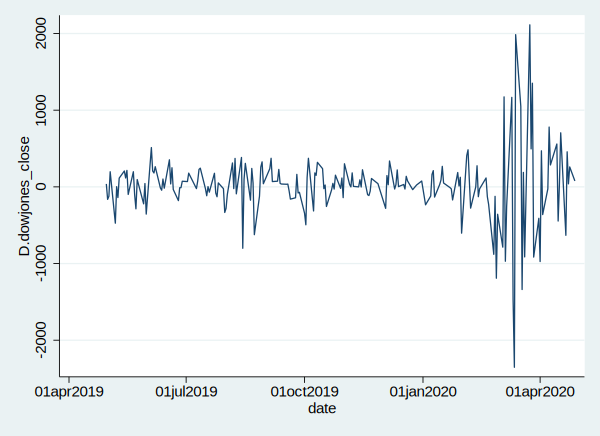

In [51]:
tsline d.dowjones_close

Det går upp och ned, med extrema svängningar under Coronapandemin.

Vi kan också lagga förändringsvariabler. Om vi till exempel skriver `l.d.dowjones_close` får vi gårdagens förändring, alltså förändring mellan i förrgår och igår. I grafen nedan jämför vi förändringen från igår till idag (alltså i relation till det aktuella datumet) med förändringen från i förrgår till igår. Här har jag gjort en scatterplot med en utritad regressionslinje:

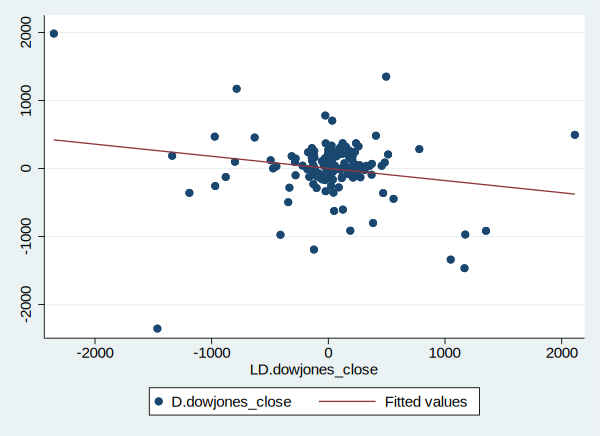

In [52]:
twoway (scatter d.dowjones_close l.d.dowjones_close) (lfit d.dowjones_close l.d.dowjones_close)

Sambandet är inte jättestarkt, men regressionslinjen lutar nedåt. Det betyder att dagar med stora ökningar (dvs långt till höger i grafen) tenderar att följas av dagar med minskningar. Alltså en återgång till medelvärdet. På samma sätt brukar stora minskningar i genomsnitt följas av ökningar.

Punkten längst upp till vänster är till exempel 13 mars 2020. Mellan 11 och 12 mars sjönk Dow Jones med över 2000 punkter. Men mellan 12 och 13 mars ökade det istället med 2000 punkter, och hämtade igen nedgången!

## Spara variablerna
När man använder de här olika prefixen skapas tillfälliga variabler. De går att använda i analyserna, men syns inte i datamängden. Om man vill spara variablerna går det också bra. Då använder vi `generate`-kommandot, och gör på samma sätt. Till exempel skapar vi i koden nedan variabler som visar värdet på Dow Jones dagen innan det aktuella datumet, samt förändringen från dagen innan.

In [53]:
gen l_dowjones_close = l.dowjones_close
gen d_dowjones_close = d.dowjones_close


(61 missing values generated)

(65 missing values generated)


De nya variablerna kan man kalla vad man vill. Personligen gillar jag att använda samma bokstäver som i Statas egna kommandon, fast med understreck istället för punkter. Om vi nu tittar på datan igen ser vi att de nya variablerna dykt upp:

In [54]:
list in 1/10


     +--------------------------------------------------------+
     |      date   dowjo~se   dowjo~me   l_dowj~e   d_dowjo~e |
     |--------------------------------------------------------|
  1. | 29apr2019    26554.4    2.8e+08          .           . |
  2. | 30apr2019    26592.9    3.4e+08   26554.39    38.51953 |
  3. | 01may2019    26430.1    3.0e+08   26592.91   -162.7695 |
  4. | 02may2019    26307.8    2.9e+08   26430.14   -122.3516 |
  5. | 03may2019    26504.9    2.5e+08   26307.79    197.1602 |
     |--------------------------------------------------------|
  6. | 06may2019    26438.5    2.8e+08          .           . |
  7. | 07may2019    25965.1    3.3e+08   26438.48   -473.3906 |
  8. | 08may2019    25967.3    2.8e+08   25965.09    2.240234 |
  9. | 09may2019    25828.4    3.3e+08   25967.33   -138.9707 |
 10. | 10may2019    25942.4    2.9e+08   25828.36    114.0098 |
     +--------------------------------------------------------+


Vi ser också att det matchar: Den 30:e april är värdet på l_dowjones_close 26554.39, samma som värdet på dowjones_close dagen innan.

## Avslutning
Det här var en mycket grundläggande introduktion till hur man ställer in datan för tidsserieanalys. Att analysera datan med regressionsanalyser och liknande kräver lite speciella hänsyn, som vi får gå igenom i ett annat inlägg.

Vi hade här också bara en tidsserie. Ofta har man data över tid, på flera enheter. Det kallas då paneldata. Det kräver i sin tur lite andra inställningar (men prefixen `l.`, `f.` och `d.` funkar även där.